**Merging transactions**

In [1]:
import pandas as pd

'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

'Only to be used if "all_tranformations.csv" does not exist.'

**Merging datagrames**

In [2]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df2 = pd.merge(df2, df3, on='user_id')
data = pd.merge(df2, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [3]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [4]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'num_referrals'], axis=1)

**Column Tranformations**

In [5]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [6]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

In [7]:
currency_ = {'FAILED': 0, 'DECLINED': 0, 'COMPLETED': 1, 'REVERTED': 0, 'PENDING': 0, 'CANCELLED': 0}
data['transactions_state'] = data['transactions_state'].map(currency_)

**Plots**

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

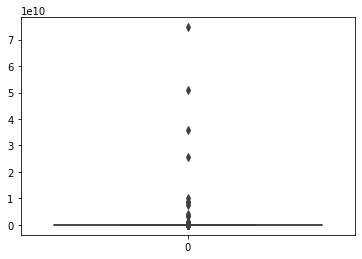

In [9]:
sns.boxplot(data=data["amount_usd"])

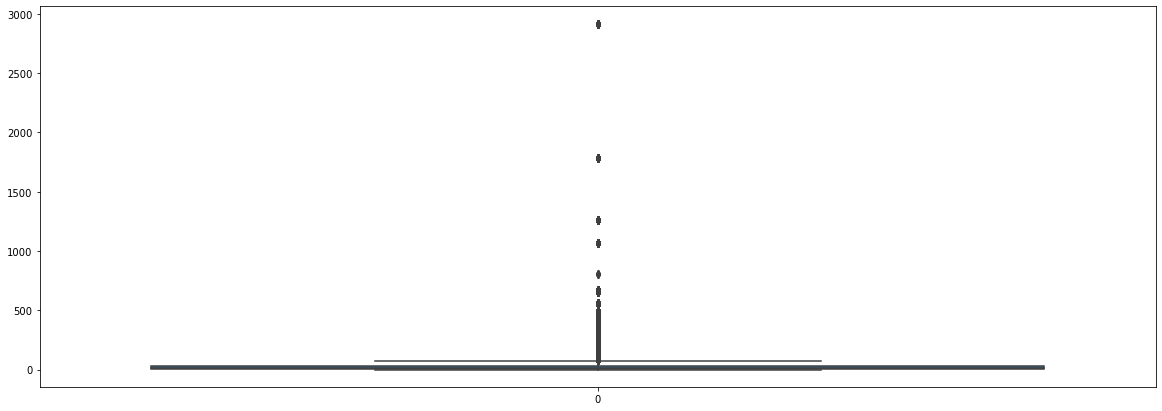

In [22]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data["num_contacts"])

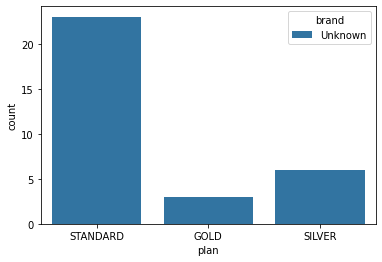

In [20]:
sns.countplot(x='plan', data=df2, hue='brand')

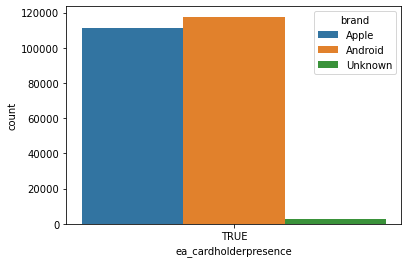

In [16]:
sns.countplot(x='ea_cardholderpresence', data=test, hue='brand')

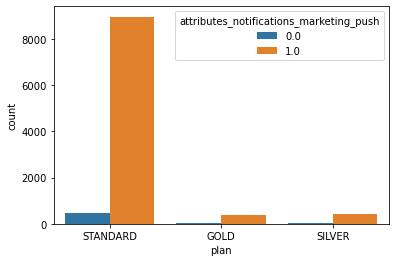

In [28]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_push')

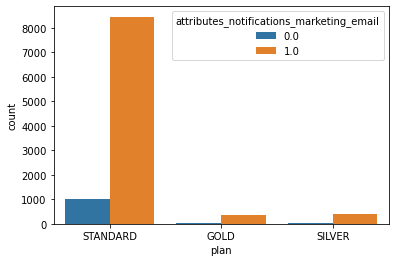

In [29]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_email')

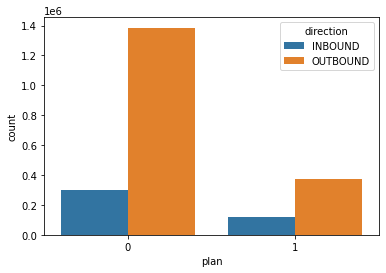

In [45]:
sns.countplot(x='plan', data=data, hue='direction')

**Aggregating**

In [24]:
users_agg_df = data.groupby(["user_id"]).agg({'birth_year': 'first', 'user_country': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'}).reset_index()
users_agg_df

,user_id,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
0,user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple
1,user_1,1985,LT,2018-01-11 18:53:10.531146,1,0,75,Apple
2,user_10,2000,LT,2018-01-26 18:40:43.166413,1,0,19,Apple
3,user_100,1986,FR,2018-12-02 14:18:09.034151,0,0,0,Android
4,user_1000,1988,SE,2018-03-22 22:08:56.267644,0,1,13,Apple
...,...,...,...,...,...,...,...,...
15007,user_9995,1989,PL,2018-06-05 06:16:51.861843,0,0,0,Apple
15008,user_9996,1964,GB,2018-10-26 03:59:55.030756,0,0,0,Apple
15009,user_9997,1991,GB,2018-08-18 04:07:31.402857,0,0,6,Android
15010,user_9998,1990,PL,2019-01-02 02:17:00.962571,0,0,21,Android


In [35]:
transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': [min, max]}).reset_index()
transactions_date_agg

user_id    transaction_created_date                            
                                         min                         max
0         user_0  2018-09-10 18:49:34.970855  2019-05-10 17:59:14.524855
1         user_1  2018-02-04 08:27:53.463146  2019-05-04 02:30:11.492146
2        user_10  2018-06-29 15:37:38.050413  2019-05-11 13:07:42.624413
3       user_100  2018-12-02 14:22:58.423151  2019-02-24 13:36:50.054151
4      user_1000  2019-03-27 11:03:23.105644  2019-05-05 19:08:42.183644
...          ...                         ...                         ...
15007  user_9995  2018-06-16 19:51:44.248843  2019-05-01 12:21:34.372843
15008  user_9996  2018-10-26 04:02:43.183756  2019-01-08 08:54:44.229756
15009  user_9997  2018-08-18 04:15:20.234857  2019-04-27 00:32:53.447857
15010  user_9998  2019-01-02 02:23:38.707571  2019-03-15 09:27:13.108571
15011  user_9999  2019-05-07 23:21:55.532284  2019-05-10 14:07:57.842284

[15012 rows x 3 columns]

In [41]:
data["direction"].value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

**Tests and raw code**

In [10]:
data.groupby(["user_id", "transaction_type"]).agg({'birth_year': 'first', 'user_country': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'num_referrals': 'first', 'brand': 'first', 'transactions_currency': 'sum', 'amount_usd': 'sum', 'transactions_state', 'ea_cardholderpresence', 'direction', 'transaction_created_date'})

,birth_year
user_id,
user_0,1992
user_1,1985
user_10,2000
user_100,1986
user_1000,1988
...,...
user_9995,1989
user_9996,1964
user_9997,1991


In [ ]:
test1 = data.groupby(["user_id"]).agg({'birth_year': 'first', 'user_country': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'})
test1

In [ ]:
df2["brand"].value_counts()

In [9]:
df2["brand"].value_counts()

,birth_year,user_country,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,brand
user_id,,,,,,,
user_0,1992,ES,2018-09-10 18:46:42.843855,0,0,3,Apple
user_1,1985,LT,2018-01-11 18:53:10.531146,1,0,75,Apple
user_10,2000,LT,2018-01-26 18:40:43.166413,1,0,19,Apple
user_100,1986,FR,2018-12-02 14:18:09.034151,0,0,0,Android
user_1000,1988,SE,2018-03-22 22:08:56.267644,0,1,13,Apple
...,...,...,...,...,...,...,...
user_9995,1989,PL,2018-06-05 06:16:51.861843,0,0,0,Apple
user_9996,1964,GB,2018-10-26 03:59:55.030756,0,0,0,Apple
user_9997,1991,GB,2018-08-18 04:07:31.402857,0,0,6,Android


In [40]:
df2["brand"].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64